In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import csv

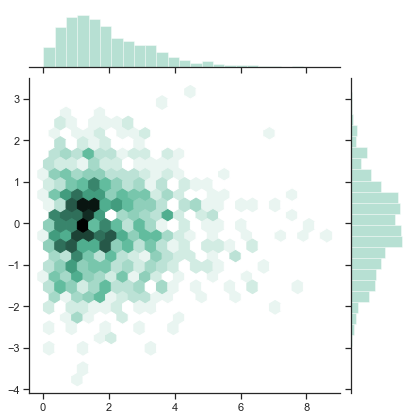

In [13]:
sns.set(style="ticks")

rs = np.random.RandomState(500)
x = rs.gamma(2, size=1000)
y = -.015 * x + rs.normal(size=1000)

sns.jointplot(x, y, kind="hex", color="#4CB391")